In [163]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [6]:
import pandas as pd
import numpy as np

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()
# X = cvect.fit(corpus)      # 학습(토큰화)
# X = X.transform(corpus)    # 변환(수치화)
X = cvect.fit_transform(corpus) # 학습(토큰화) + 변환(수치화)
print(X.toarray())
pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

[[0 1 1 0 1 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 1 0 0 0 0 0 1 0 1 0 2 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0]]


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [38]:
df = pd.DataFrame(corpus,columns=['문서'])
display(df)
df['문의'] = df['문서'].str.contains('문의')
display(df)
문의 = df.loc[df['문의'],'문서']
안내 = df.loc[~df['문의'],'문서']
문의,안내

,문서
0,코로나 거리두기와 코로나 상생지원금 문의입니다.
1,지하철 운행시간과 지하철 요금 문의입니다.
2,지하철 승강장 문의입니다.
3,코로나 선별진료소 문의입니다.
4,버스 운행시간 문의입니다.
5,버스 터미널 위치 안내입니다.
6,코로나 거리두기 안내입니다.
7,택시 승강장 문의입니다.


,문서,문의
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,True
1,지하철 운행시간과 지하철 요금 문의입니다.,True
2,지하철 승강장 문의입니다.,True
3,코로나 선별진료소 문의입니다.,True
4,버스 운행시간 문의입니다.,True
5,버스 터미널 위치 안내입니다.,False
6,코로나 거리두기 안내입니다.,False
7,택시 승강장 문의입니다.,True


(0    코로나 거리두기와 코로나 상생지원금 문의입니다.
 1       지하철 운행시간과 지하철 요금 문의입니다.
 2                지하철 승강장 문의입니다.
 3              코로나 선별진료소 문의입니다.
 4                버스 운행시간 문의입니다.
 7                 택시 승강장 문의입니다.
 Name: 문서, dtype: object,
 5    버스 터미널 위치 안내입니다.
 6     코로나 거리두기 안내입니다.
 Name: 문서, dtype: object)

In [40]:
cvect = CountVectorizer()
문의_벡터 = cvect.fit_transform(문의)
pd.DataFrame(문의_벡터.toarray(), columns=cvect.get_feature_names_out())

,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,요금,운행시간,운행시간과,지하철,코로나,택시
0,1,1,0,1,0,0,0,0,0,0,2,0
1,0,1,0,0,0,0,1,0,1,2,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,0,1


In [41]:
안내_벡터 = cvect.transform(안내)
pd.DataFrame(안내_벡터.toarray(), columns=cvect.get_feature_names_out())

,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,요금,운행시간,운행시간과,지하철,코로나,택시
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
X = cvect.fit_transform(corpus)
dtm = pd.DataFrame(X.toarray(),columns=cvect.get_feature_names_out())

In [43]:
cvect.get_feature_names_out()

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [45]:
cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [48]:
dtm

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [50]:
dtm.sum().sort_values(ascending=False)

문의입니다    6
코로나      4
지하철      3
버스       2
승강장      2
안내입니다    2
거리두기     1
거리두기와    1
상생지원금    1
선별진료소    1
요금       1
운행시간     1
운행시간과    1
위치       1
택시       1
터미널      1
dtype: int64

 ### CounterVectorize
 * analyzer
     * 기본값 : 'word'
     * 종류 : 'word','char','char_wb)
     * 함수 : 토큰화 방법
     
 * N-gram
     * 토큰을 몇 개 사용할 것인지를 구분함. 지정한 n개의 숫자 만큼의 토큰을 묶어서 사용
     
 * min_df : 최소문서 빈도 설정하기(전체문서에서 단어가 나타날수있는 최대 문서 비율)
     * 정수값: 전체문서에서 n개 이하 제외
     * 실수값: 전체문서에서 % 이하 제외
     
 * max_df : 최대문서 빈도 설정하기(전체문서에서 단어가 나타날수있는 최소 문서 비율
     * 정수값: 전체문서에서 n개 이상 제외
     * 실수값: 전체문서에서 % 이상 제외
     
 * stop_words : 의미없는 키워드(불용어) 제외
     
 * max_features : 최대 학습할 어휘 수
 

In [123]:
cvect = CountVectorizer(min_df=0.2)
X = cvect.fit_transform(corpus)
dtm = X.toarray()
dtm

array([[1, 0, 0, 0, 0, 2],
       [1, 0, 0, 0, 2, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0]], dtype=int64)

In [124]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [125]:
pd.DataFrame(dtm, columns=cvect.get_feature_names_out()).style.background_gradient()

,문의입니다,버스,승강장,안내입니다,지하철,코로나
0,1,0,0,0,0,2
1,1,0,0,0,2,0
2,1,0,1,0,1,0
3,1,0,0,0,0,1
4,1,1,0,0,0,0
5,0,1,0,1,0,0
6,0,0,0,1,0,1
7,1,0,1,0,0,0


In [131]:
stop_words = ['코로나','문의입니다']
cvect = CountVectorizer(ngram_range=(1,6), min_df=1, max_df=0.9, max_features=10, stop_words=stop_words)
cvect.fit_transform(corpus)
cvect.get_feature_names_out()

array(['거리두기', '버스', '승강장', '안내입니다', '지하철', '지하철 운행시간과 지하철',
       '지하철 운행시간과 지하철 요금', '택시', '택시 승강장', '터미널'], dtype=object)

In [137]:
cvect = CountVectorizer(analyzer='char', ngram_range=(1,6), min_df=1, max_df=0.9, max_features=10)
cvect.fit_transform(corpus)
cvect.get_feature_names_out()

array([' 문', ' 문의입', ' 문의입니', ' 문의입니다', '문', '문의입', '문의입니', '문의입니다',
       '문의입니다.', '의'], dtype=object)

### TF-IDF(Term Frequency-Inverse Document Frequency)

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer   # CountVectorizer + TfidfTransformer

tfidvect = TfidfVectorizer()
# X = tfidvect.fit(corpus).transform(corpus)
X = tfidvect.fit_transform(corpus)
X

<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [167]:
# TF : 문서에 토큰이 많이 나타날수록 가중치는 더 커진다.
# IDF : 그러나 토큰이 여러 문서에 많이 등장할수록 가중치는 감소한다.

dtm = X.toarray()  # TF * IDF
dtm

array([[0.        , 0.47991911, 0.23982075, 0.        , 0.47991911,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.69414789, 0.        ,
        0.        ],
       [0.        , 0.        , 0.22216587, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44458893, 0.        ,
        0.44458893, 0.        , 0.74520044, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38849954, 0.        , 0.        ,
        0.        , 0.65156278, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.65156278, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37531751, 0.        , 0.        ,
        0.7510695 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5431679 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35765909, 0.59983945, 0.        ,
        0.        , 0.        , 

In [152]:
df = pd.DataFrame(dtm, columns=tfidvect.get_feature_names_out())
df

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.00000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.00000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.75107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.00000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.00000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.00000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [149]:
df.sum().sort_values(ascending=False)

문의입니다    1.941122
코로나      1.722104
지하철      1.396763
승강장      1.251402
버스       1.054034
안내입니다    1.015995
선별진료소    0.751070
운행시간     0.715732
택시       0.715732
거리두기     0.670344
위치       0.541948
터미널      0.541948
거리두기와    0.479919
상생지원금    0.479919
요금       0.444589
운행시간과    0.444589
dtype: float64

In [153]:
# 전체문서를 분자로 전체문서에 출현한 빈도
tfidvect.idf_

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [155]:
vocab = tfidvect.get_feature_names_out()
vocab

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [160]:
idf_dict = dict(zip(vocab,tfidvect.idf_))
idf_dict

{'거리두기': 2.504077396776274,
 '거리두기와': 2.504077396776274,
 '문의입니다': 1.251314428280906,
 '버스': 2.09861228866811,
 '상생지원금': 2.504077396776274,
 '선별진료소': 2.504077396776274,
 '승강장': 2.09861228866811,
 '안내입니다': 2.09861228866811,
 '요금': 2.504077396776274,
 '운행시간': 2.504077396776274,
 '운행시간과': 2.504077396776274,
 '위치': 2.504077396776274,
 '지하철': 2.09861228866811,
 '코로나': 1.8109302162163288,
 '택시': 2.504077396776274,
 '터미널': 2.504077396776274}

<Axes: >

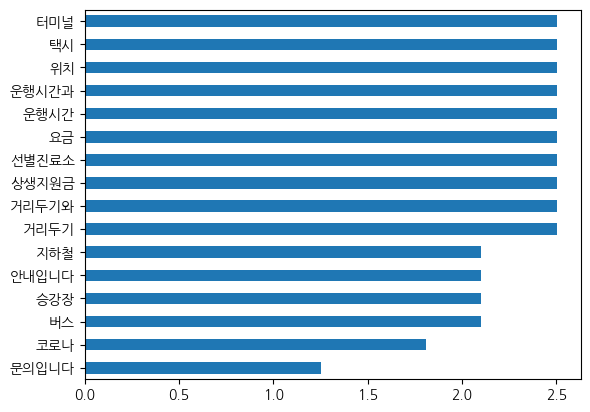

In [166]:
pd.Series(idf_dict).sort_values(ascending=True).plot.barh()